In [18]:
import pandas as pd
data=pd.read_csv("/content/dermatology_database_1.csv")
print(data)

     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0         

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

    data.replace('?', np.nan, inplace=True)

    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    y_pred_svm = svm_classifier.predict(X_test)

    accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 96.36%


In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

    data.replace('?', np.nan, inplace=True)

    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred_rf = rf_classifier.predict(X_test)

    accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 96.36%


In [21]:
for column in data.columns:
      data[column] = pd.to_numeric(data[column], errors='coerce')
      data.replace('?', np.nan, inplace=True)
      X = data.iloc[:, :-1].values
      y = data.iloc[:, -1].values
      imputer = SimpleImputer(strategy='mean')
      X = imputer.fit_transform(X)

      Q1 = np.quantile(X, 0.25, axis=0)
      Q3 = np.quantile(X, 0.75, axis=0)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      outlier_mask = np.any((X < lower_bound) | (X > upper_bound), axis=1)
      X_no_outliers = X[~outlier_mask]
      y_no_outliers = y[~outlier_mask]
      X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

In [22]:
# SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (without outliers): {accuracy_svm * 100:.2f}%")

SVM Accuracy (without outliers): 88.89%


In [23]:
#rf
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (without outliers): {accuracy_rf * 100:.2f}%")

Random Forest Accuracy (without outliers): 88.89%


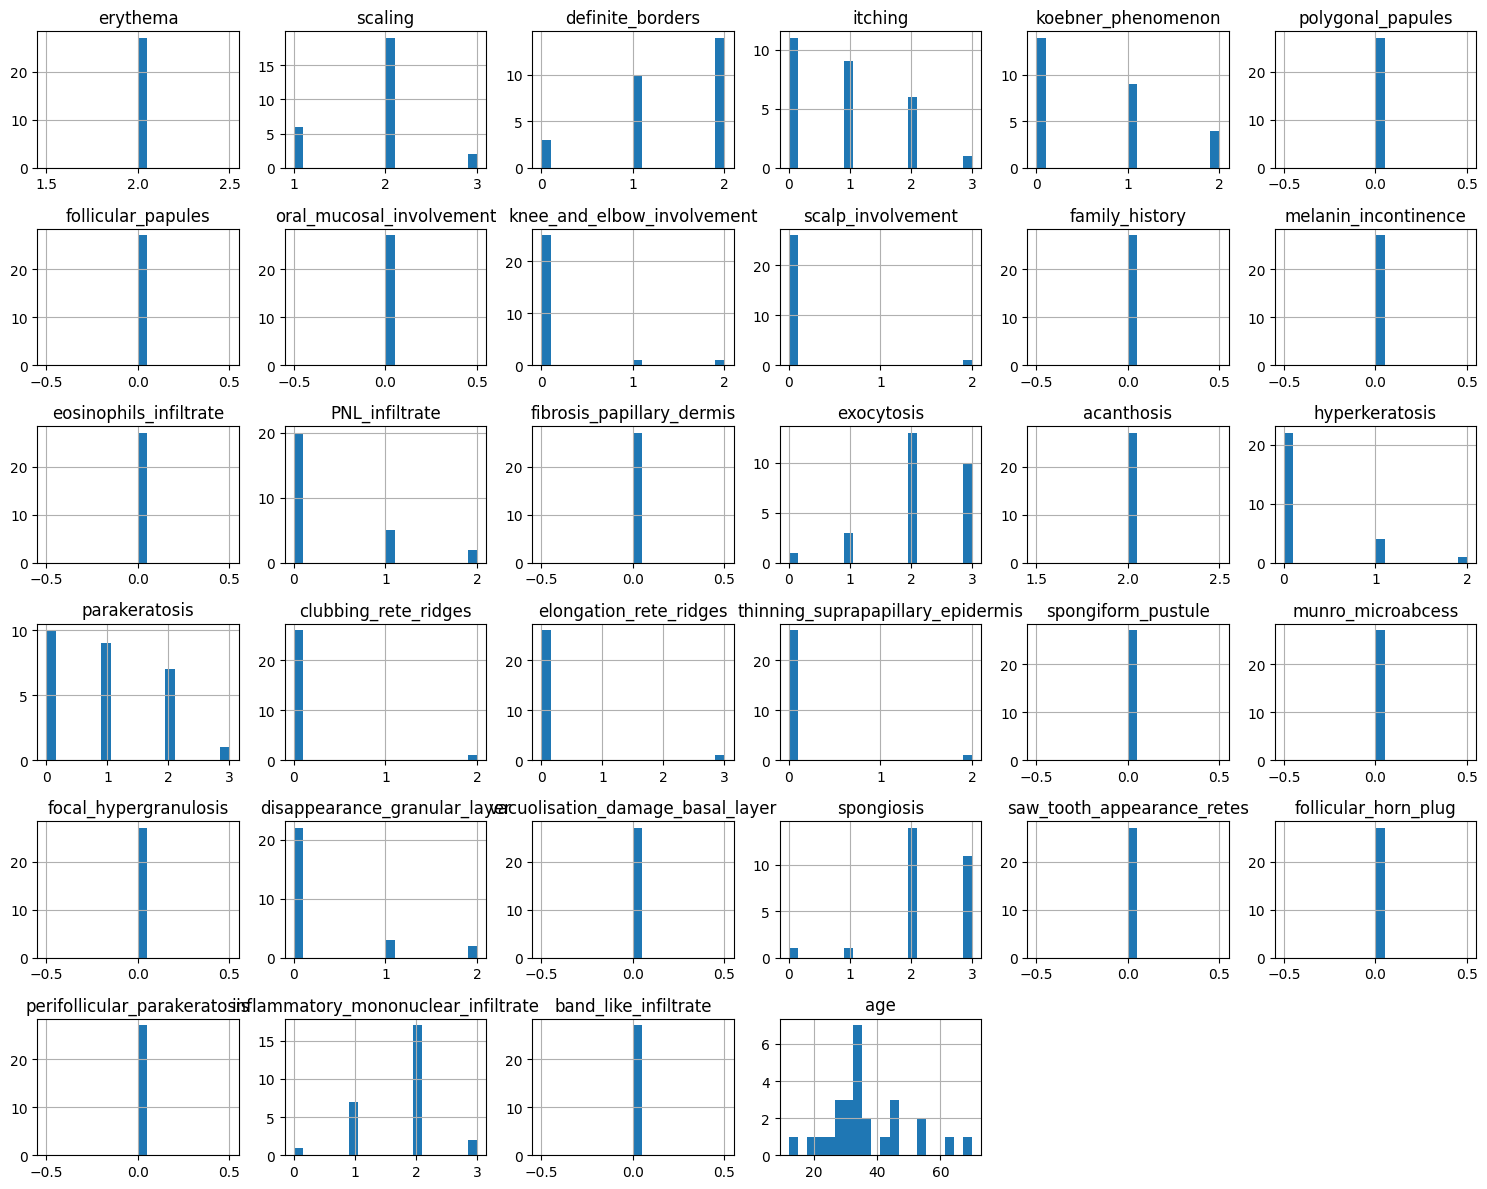

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

df_no_outliers = pd.DataFrame(X_no_outliers, columns=data.columns[:-1])
df_no_outliers.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

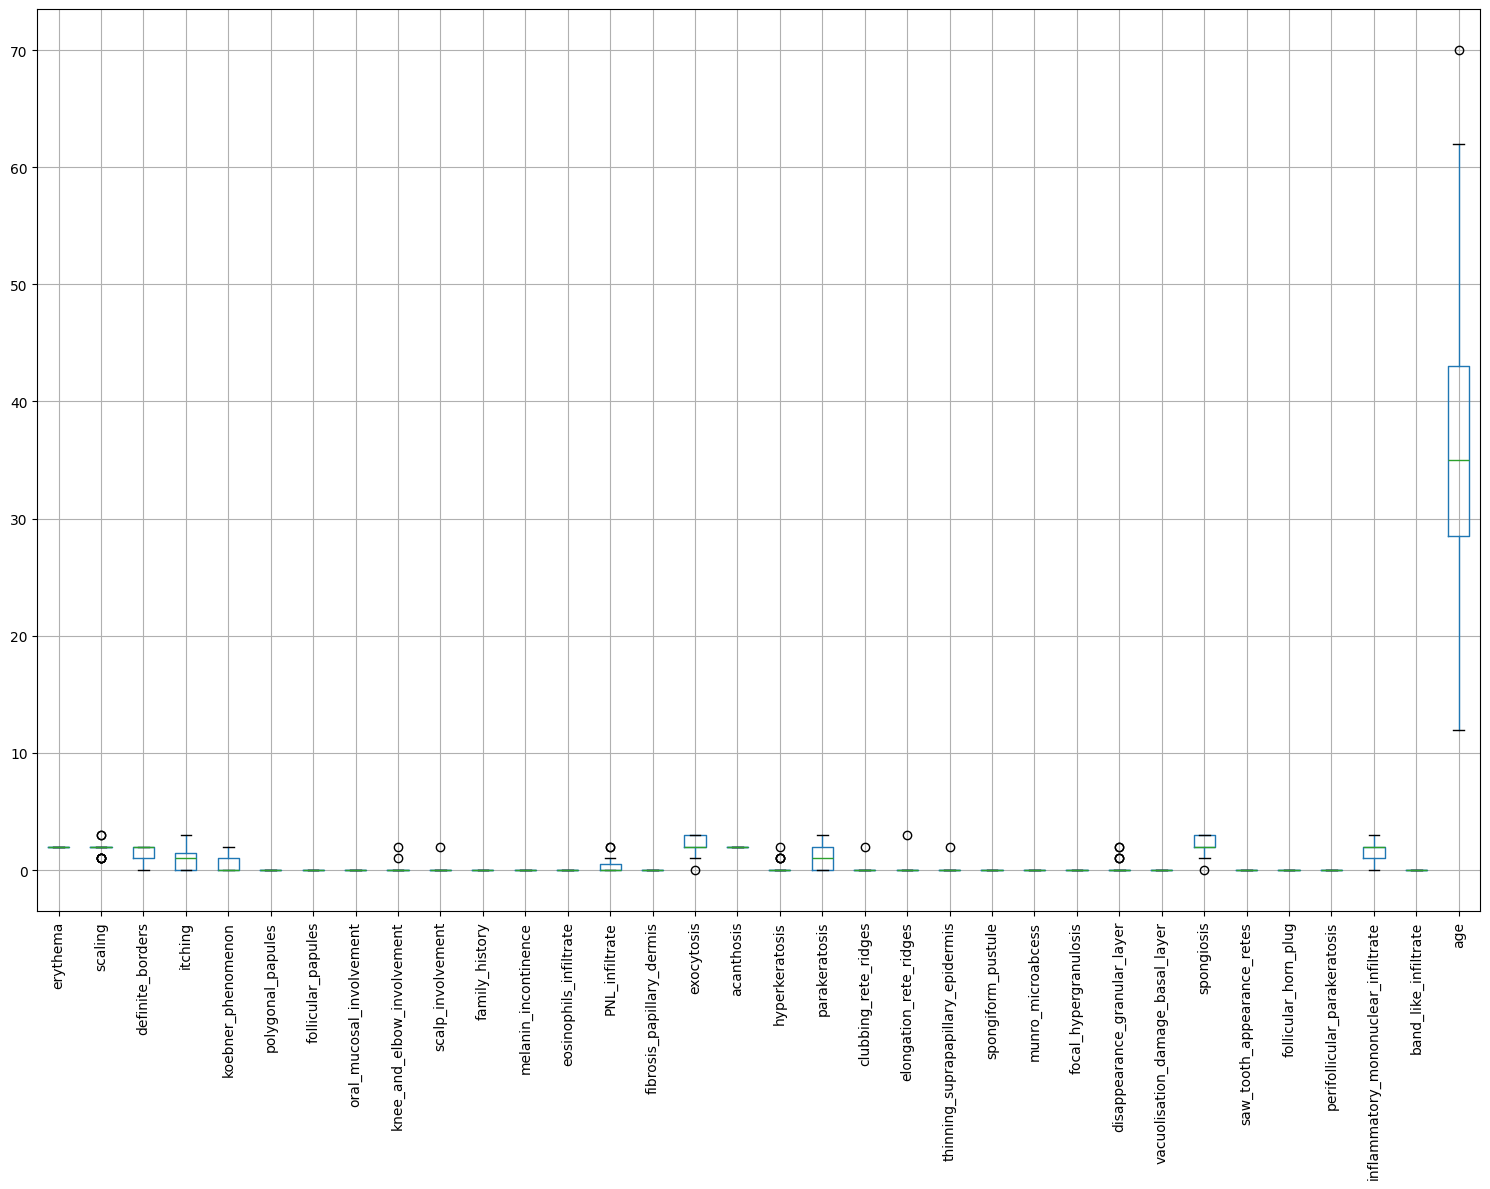

In [26]:
df_no_outliers = pd.DataFrame(X_no_outliers, columns=data.columns[:-1])
plt.figure(figsize=(15, 12))
df_no_outliers.boxplot(rot=90)
plt.tight_layout()
plt.show()


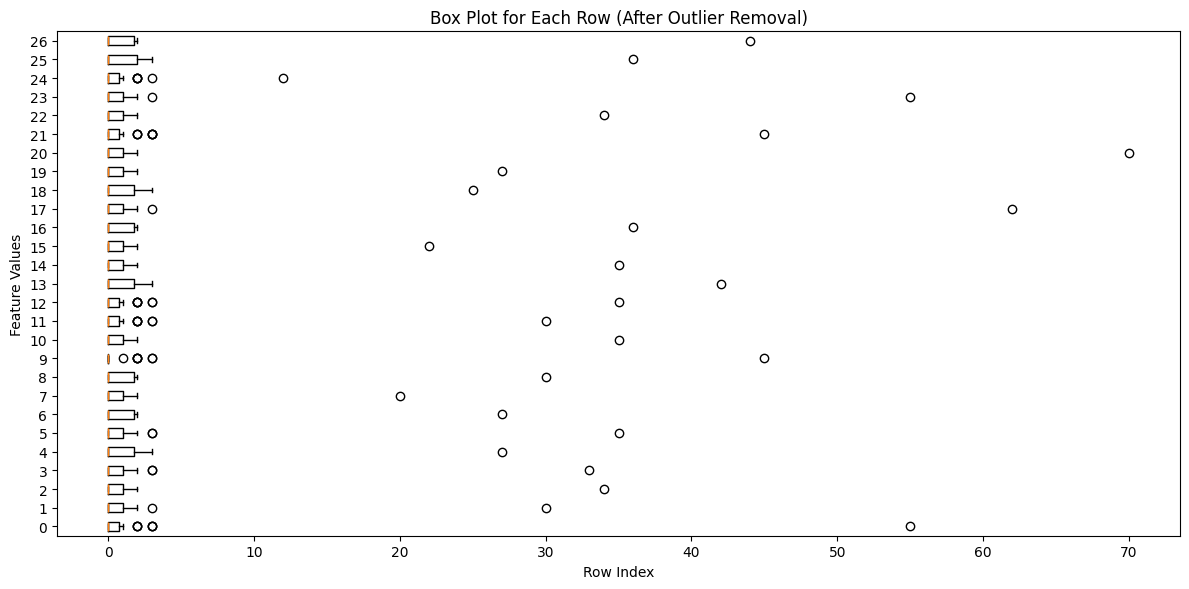

In [28]:
plt.figure(figsize=(12, 6))
for i in range(X_no_outliers.shape[0]):
    plt.boxplot(X_no_outliers[i, :], positions=[i], vert=False, widths=0.5)
    plt.xlabel("Row Index")
    plt.ylabel("Feature Values")
    plt.title("Box Plot for Each Row (After Outlier Removal)")
    plt.tight_layout()
plt.show()